# GAYATRI INTRO 

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

## Importing Adobe Stocks Data

In [76]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

  
# Set DataFrame as the Stock Ticker
adobe = DataReader("ADBE", 'yahoo', start, end)

In [77]:
adobe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-02-05,198.460007,188.000000,194.059998,190.270004,3801300,190.270004
2018-02-06,194.820007,182.100006,186.589996,194.470001,4480000,194.470001
2018-02-07,196.240005,192.020004,193.869995,192.339996,2988000,192.339996
2018-02-08,192.970001,185.020004,192.839996,185.160004,3978700,185.160004
2018-02-09,189.710007,179.339996,187.330002,187.990005,3818800,187.990005
...,...,...,...,...,...,...
2021-02-01,474.799988,459.820007,462.279999,470.000000,2554800,470.000000
2021-02-02,487.369995,472.549988,473.649994,484.929993,3022000,484.929993
2021-02-03,488.850006,479.170013,487.089996,481.920013,2146900,481.920013


In [78]:
adobe.describe()

,High,Low,Open,Close,Volume,Adj Close
count,757.000000,757.000000,757.000000,757.000000,7.570000e+02,757.000000
mean,322.959960,314.624729,319.086909,319.090780,3.014563e+06,319.090780
std,91.044402,88.564092,90.085671,89.877518,1.420282e+06,89.877518
min,189.710007,179.339996,186.589996,185.160004,5.892000e+05,185.160004
25%,254.800003,250.130005,252.729996,253.389999,2.097400e+06,253.389999
50%,285.869995,278.350006,283.140015,282.440002,2.634200e+06,282.440002
75%,374.480011,367.149994,371.589996,371.420013,3.553300e+06,371.420013
max,536.880005,521.409973,536.250000,533.799988,1.218940e+07,533.799988


In [79]:
adobe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2018-02-05 to 2021-02-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       757 non-null    float64
 1   Low        757 non-null    float64
 2   Open       757 non-null    float64
 3   Close      757 non-null    float64
 4   Volume     757 non-null    int64  
 5   Adj Close  757 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 41.4 KB


## Plotting Adjusted Close Price

Text(0.5, 1.0, 'Adjusted Close Price')

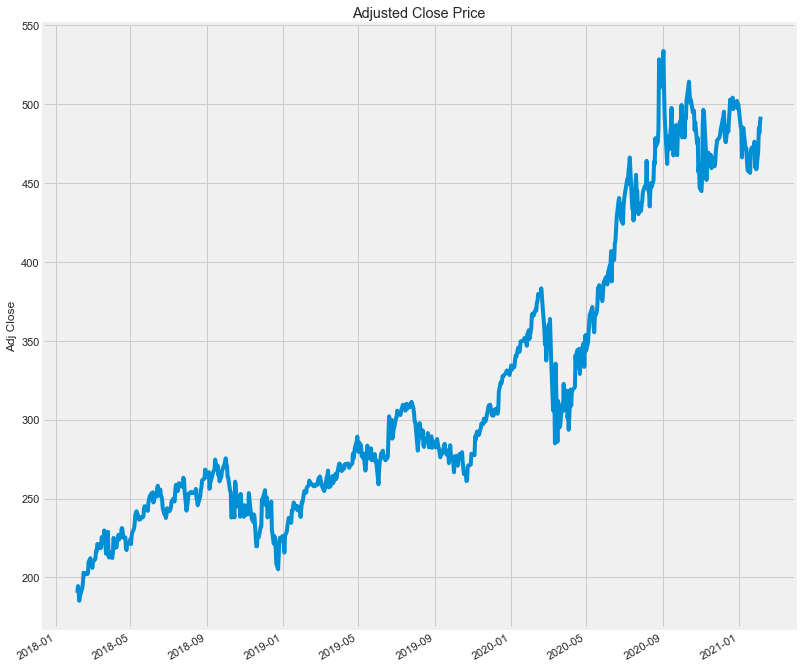

In [80]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title("Adjusted Close Price")

## Plotting Close Price

Text(0.5, 1.0, 'Close Price')

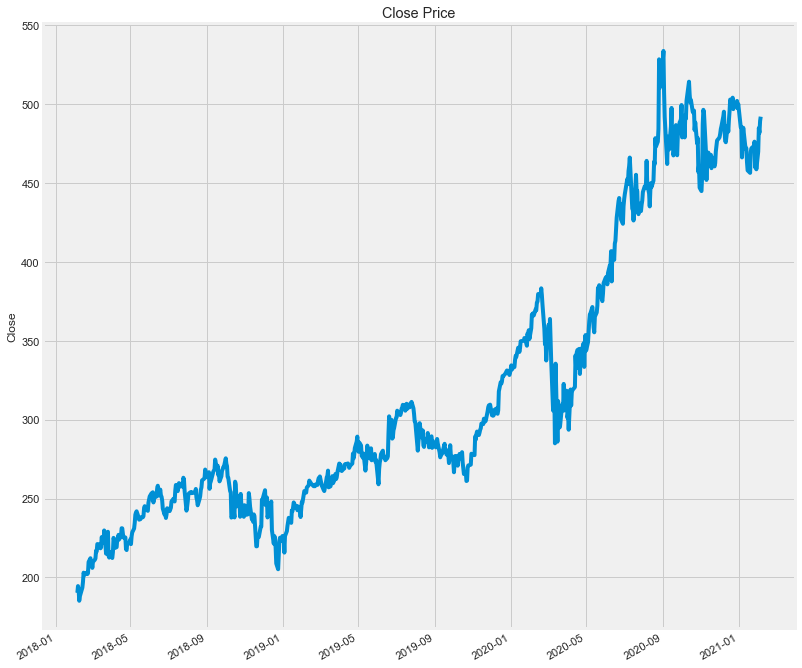

In [82]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Close Price")

## Plotting Opening Price

Text(0.5, 1.0, 'Open')

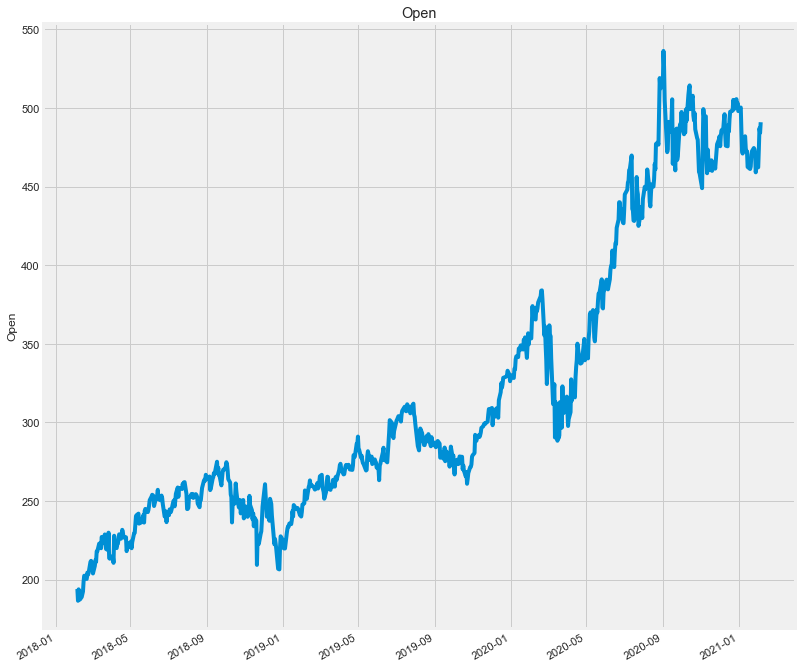

In [83]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Open'].plot()
plt.ylabel('Open')
plt.xlabel(None)
plt.title("Open")

## Plotting High Price 

Text(0.5, 1.0, 'High')

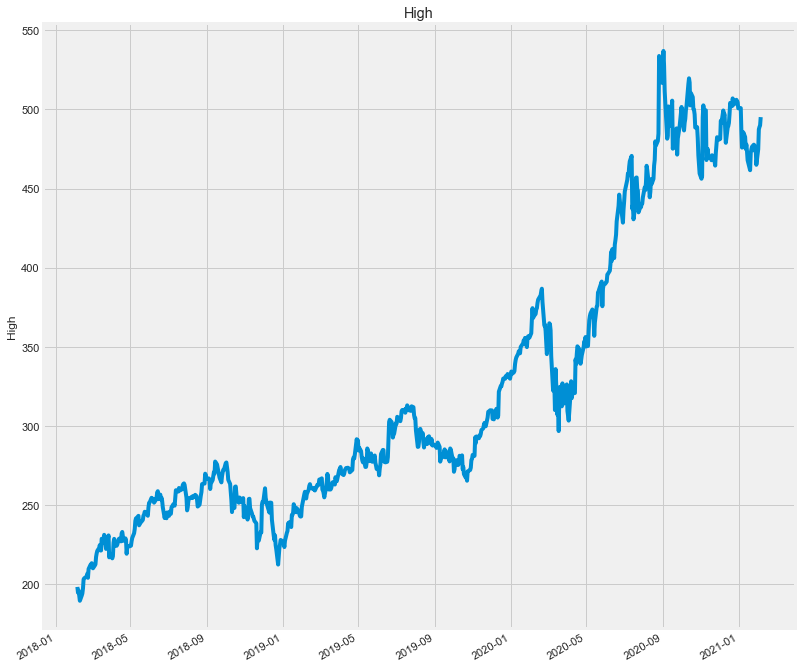

In [84]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['High'].plot()
plt.ylabel('High')
plt.xlabel(None)
plt.title("High")

## Plotting Low Price

Text(0.5, 1.0, 'Low')

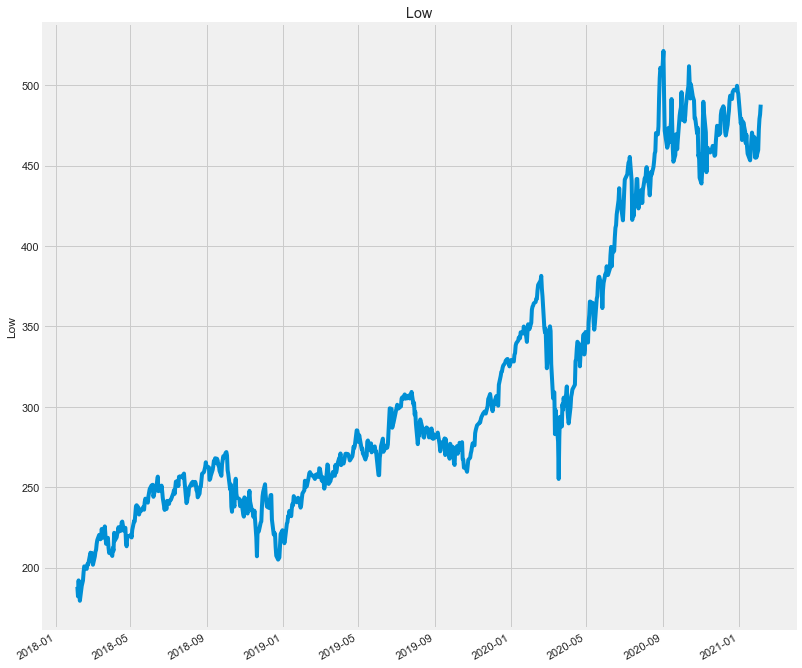

In [85]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Low'].plot()
plt.ylabel('Low')
plt.xlabel(None)
plt.title("Low")

## Plotting Volume of Stocks Traded

Text(0.5, 1.0, 'Volume')

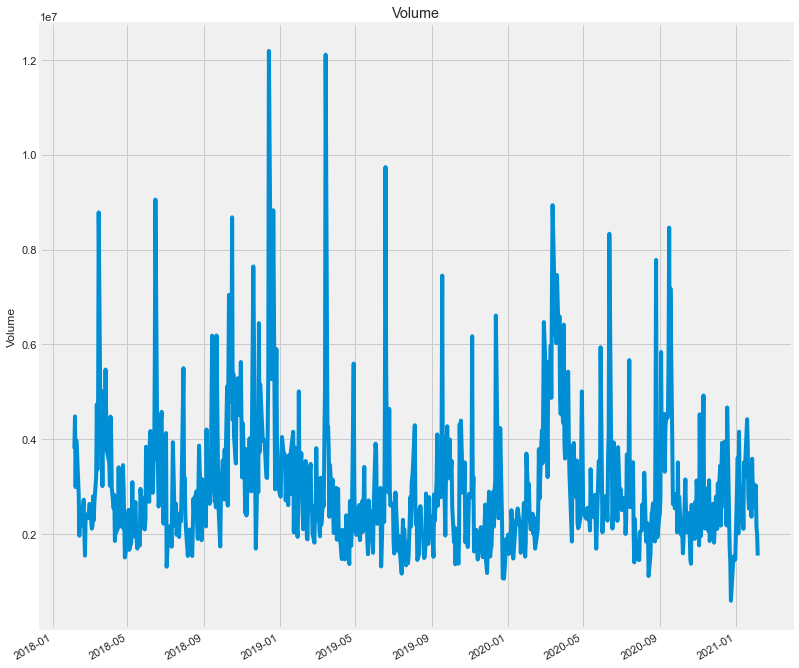

In [81]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

adobe['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Volume")

## Moving Average

In [87]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    adobe[column_name] = adobe['Adj Close'].rolling(ma).mean()

In [88]:
adobe.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'MA for 10 days',
       'MA for 20 days', 'MA for 50 days'],
      dtype='object')

<Figure size 864x576 with 0 Axes>

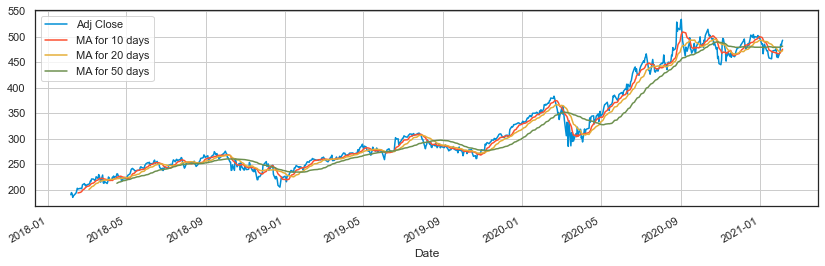

In [73]:
plt.figure(figsize=(12, 8))
adobe[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.legend(loc='best')
plt.grid(True)
plt.set_title('Moving Average of Adjusted Close for the Adobe Stocks')

# Rachcha

## Plotting Distributions for all the Prices and Moving Averages

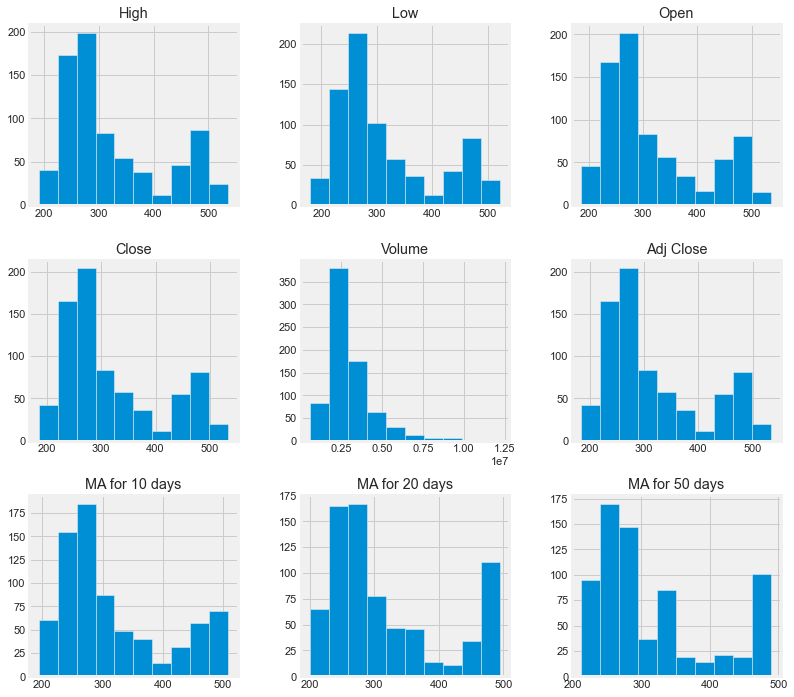

In [37]:
adobe.hist(figsize=(12, 12));

## Plotting Daily Returns

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

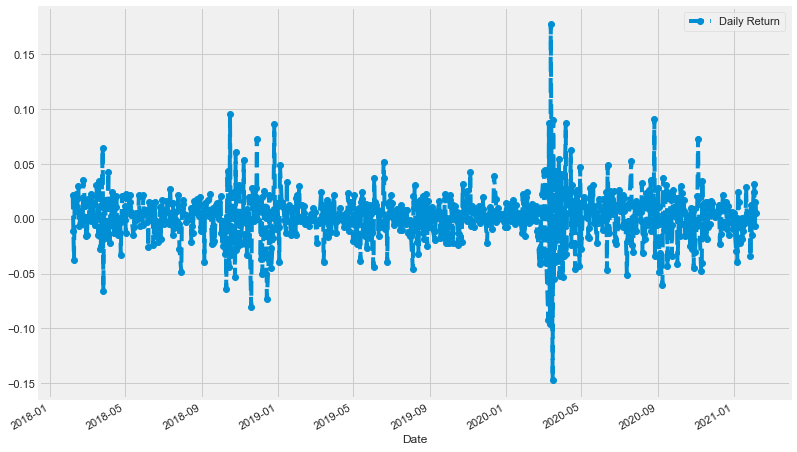

In [99]:
plt.figure(figsize=(12, 8))
adobe['Daily Return'] = adobe['Adj Close'].pct_change()
adobe['Daily Return'].plot( legend=True, linestyle='--', marker='o')
plt.legend(loc='best')
plt.grid(True)

## Plotting Daily Returns Distribution

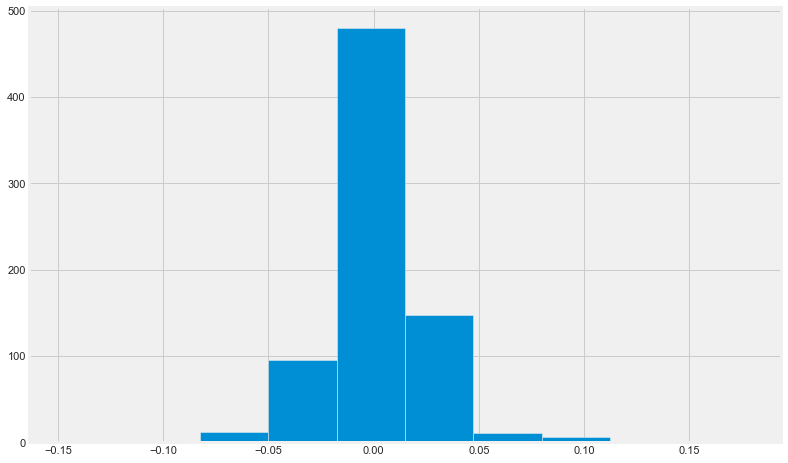

In [100]:
plt.figure(figsize=(12, 8))
adobe['Daily Return'].hist()
plt.grid(True)

## Plotting Daily Returns Distribution

<AxesSubplot:>

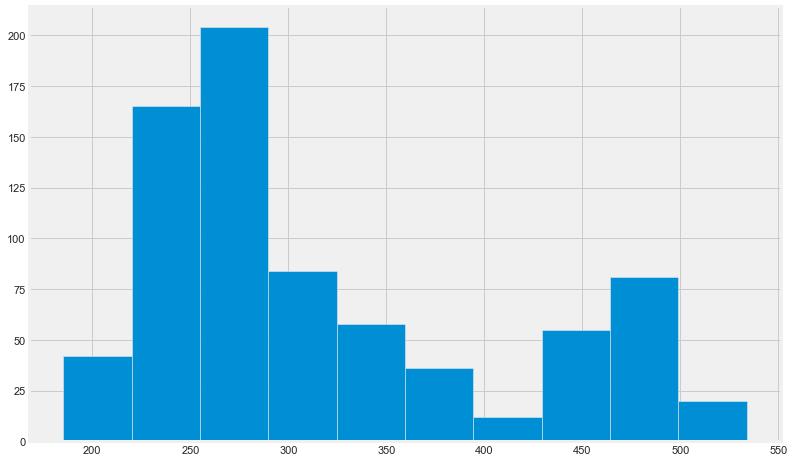

In [41]:
plt.figure(figsize=(12, 8))
adobe['Adj Close'].hist()

## Plotting Close Price Distribution

<AxesSubplot:>

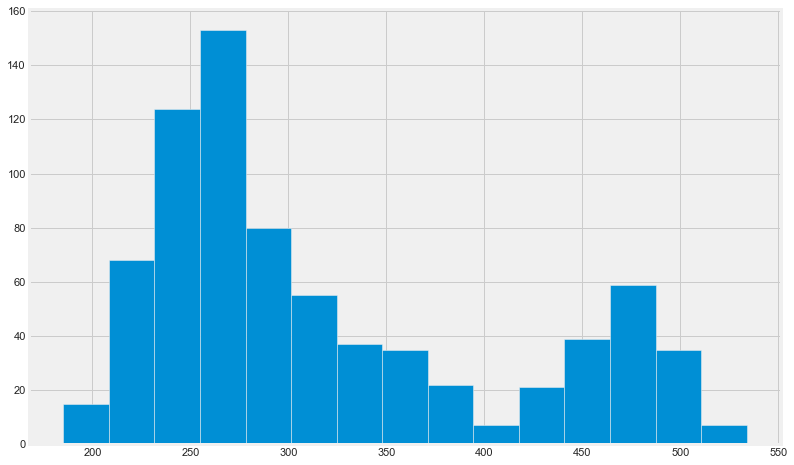

In [43]:
plt.figure(figsize=(12, 8))
adobe['Close'].hist(bins = 15)

## Converting LogNormal Mixture Model to Nomal Mixture Model

In [101]:
X = np.log(adobe['Adj Close'])

By taking the log of the whole data we can expect the Data to be Normally Distributed

# RAchcha till here

<AxesSubplot:>

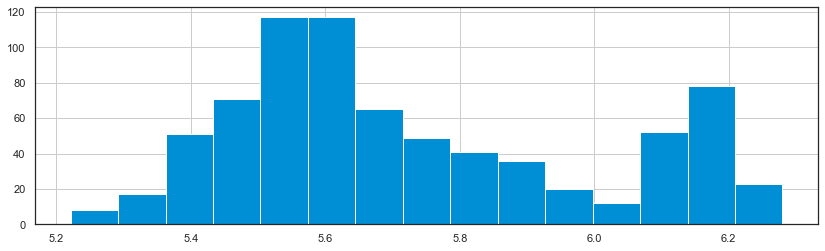

In [102]:
plt.figure(figsize=(12, 8))
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm


# %load std_ipython_import.txt
import pandas as pd
import scipy as spy


import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
X.hist(bins = 15)

The LogNormal Mixture has been fairly converted to a mixture of Normal Distributions by taking log of the whole data

In [61]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.mixture import GaussianMixture

from matplotlib.colors import LogNorm


# %load std_ipython_import.txt
import pandas as pd
import scipy as spy


import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

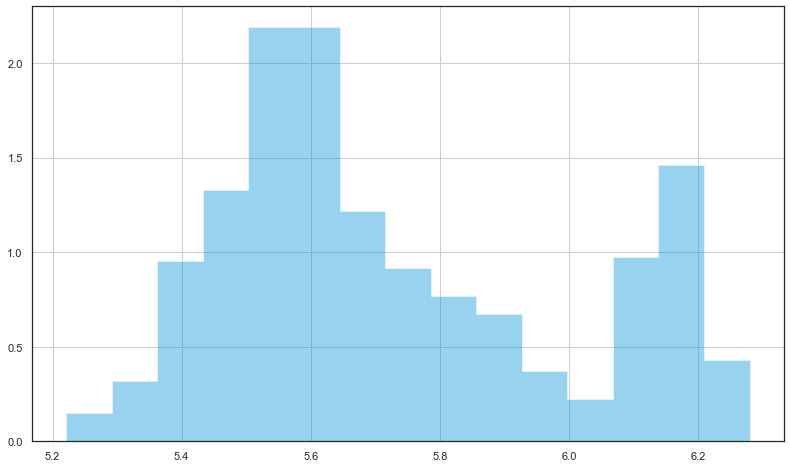

In [103]:
plt.figure(figsize=(12, 8))

plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)
plt.grid(True)

It can be observed that the above Distribution is a mixture of multiple Normal Distributions. We have to find out how many components does the mixture contain

In [63]:
X = X.values.reshape(-1,1)

## Fitting Number of Components

In [64]:
mixm = GaussianMixture(n_components=2, random_state=1, verbose=1)
mixm.fit(X)

Initialization 0
  Iteration 10
Initialization converged: True


GaussianMixture(n_components=2, random_state=1, verbose=1)

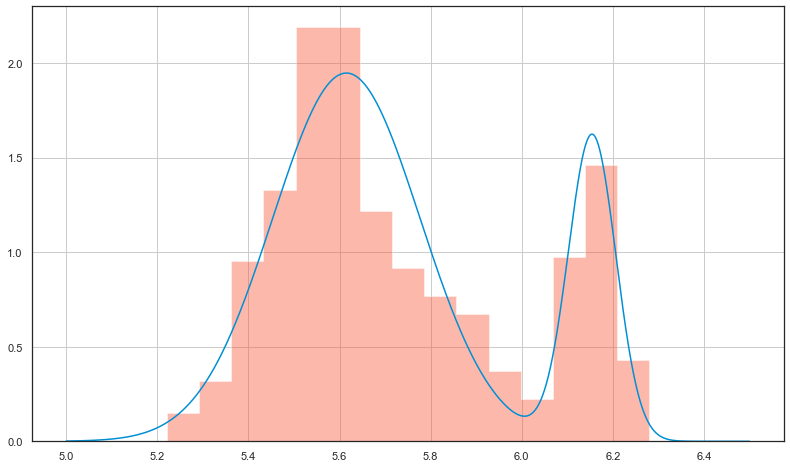

In [65]:
plt.figure(figsize=(12, 8))

x = np.linspace(5, 6.5, 1000)
logprob = mixm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf)
plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)
plt.grid(True)

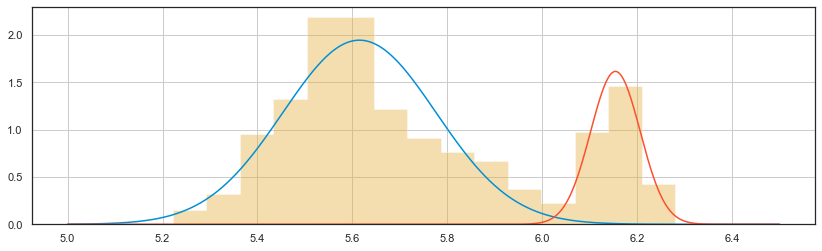

In [66]:
responsibilities = mixm.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf_individual)
plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)
plt.grid(True)

Data is fairly fitted with two components. We can go ahead with this or we can test it for more components

## Fitting the Mixture over a range of values

In [67]:
# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

let's compute some information criteria to help us pick the best possible model.

The two most popular information criteria for statistical models are Akaike's Information criterion (AIC), discovered by the statistician Hirotugu Akaike, and the Bayesian information criterion (BIC), discovered by Gideon E. Schwarz, both of which are included in scikit-learn!

In [68]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

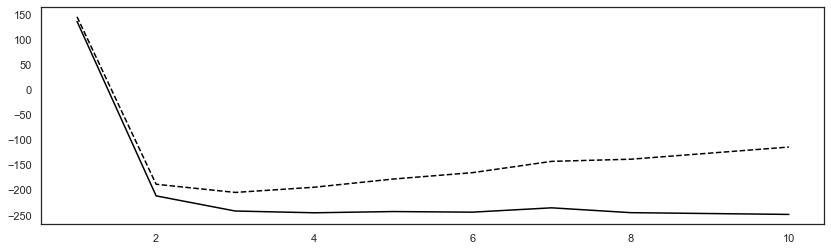

In [69]:
plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, '--k', label='BIC')

Generally, the aim is to minimize BIC, so if you are in a negative territory, a negative number that has the largest modulus (deepest down in the negative territory) indicates the preferred mode

https://r.789695.n4.nabble.com/Which-model-to-keep-negative-BIC-td885058.html

Here we can see that AIC and BIC values indicate that the we can either have 2 or 3 has the most relevant number of components to best fit the mixture 

## Analysing Results for 3 components

In [70]:
mixm = GaussianMixture(n_components=3, random_state=1, verbose=1)
mixm.fit(X)

Initialization 0
Initialization converged: True


GaussianMixture(n_components=3, random_state=1, verbose=1)

(array([0.14971699, 0.31814859, 0.95444578, 1.32873824, 2.18961091,
        2.18961091, 1.21645051, 0.91701654, 0.76729955, 0.67372643,
        0.37429246, 0.22457548, 0.9731604 , 1.45974061, 0.43043633]),
 array([5.22122034, 5.29180706, 5.36239379, 5.43298051, 5.50356724,
        5.57415396, 5.64474069, 5.71532741, 5.78591414, 5.85650086,
        5.92708759, 5.99767431, 6.06826104, 6.13884776, 6.20943449,
        6.28002121]),
 [<matplotlib.patches.Polygon at 0x1e731272e48>])

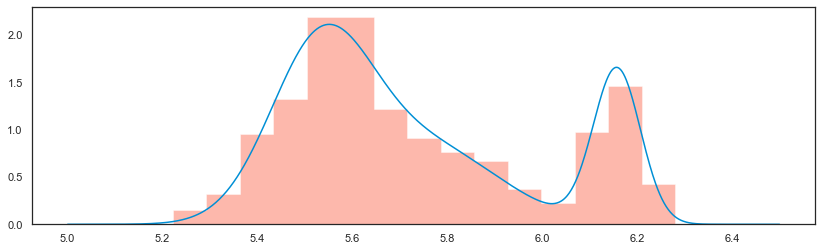

In [105]:
x = np.linspace(5, 6.5, 1000)
logprob = mixm.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(x, pdf)
plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)

(array([0.14971699, 0.31814859, 0.95444578, 1.32873824, 2.18961091,
        2.18961091, 1.21645051, 0.91701654, 0.76729955, 0.67372643,
        0.37429246, 0.22457548, 0.9731604 , 1.45974061, 0.43043633]),
 array([5.22122034, 5.29180706, 5.36239379, 5.43298051, 5.50356724,
        5.57415396, 5.64474069, 5.71532741, 5.78591414, 5.85650086,
        5.92708759, 5.99767431, 6.06826104, 6.13884776, 6.20943449,
        6.28002121]),
 [<matplotlib.patches.Polygon at 0x1e7338f5208>])

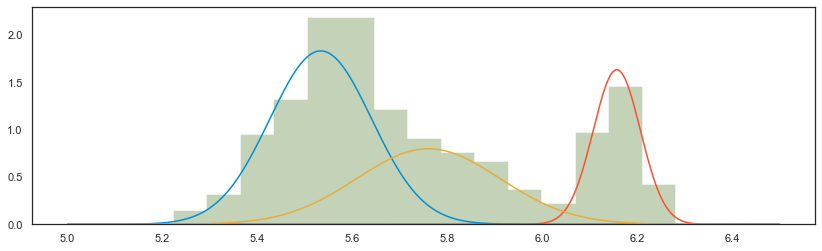

In [104]:
responsibilities = mixm.predict_proba(x.reshape(-1, 1))
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf_individual)
plt.hist(X, 15, density=True, histtype='stepfilled', alpha=0.4)

## Conclusion and Future Scope

**The mixture is better fit with three components. Which means that the Normal Distribution is a combination of 3 Normal Distributions** </br>

**To get a better understanding of the Normal Distributions we can choose an intelligent prior and perform Monte Carlo Morkov Chain simulations to get the perfect posterior.**</br>

**This will give us the parameters (Mean, Standard Deviation) for all the three Distributions which will help us in analysing the Stocks well and help us in decision making**